In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [35]:
import warnings
# we use this in order for the results to be more visible
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

We first read the data set and store it

In [21]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/AI2/project01/imdb-reviews.csv",sep='\t')

We implement the function that we use in order to prepare the data for prediction.

In [22]:
def Preparation(dataframe):
  df = dataframe[['rating','review']]
  # Replace all rating values with either 1 or 0
  df = df.replace({
    'rating' : {
        1.0 : 0.0,
        2.0 : 0.0,
        3.0 : 0.0,
        4.0 : 0.0,
        7.0 : 1.0,
        8.0 : 1.0,
        9.0 : 1.0,
        10.0 : 1.0,  
    }
  })
  dummy_list = []

  # clean all stopwords and symbols from reviews using the clean function that we implemented
  text_column = df['review']
  for value in text_column.values:
    value = Clean(value)
    dummy_list.append(value)

  df['review'] = dummy_list

  # tokenize all reviews
  fixedReviews = Tokenization(df['review'])
  # apply stemming on all reviews
  fixedReviews = Stemming(fixedReviews)
  # lemmatize all reviews
  fixedReviews = Lemmatization(fixedReviews)

  df['review'] = fixedReviews

  return df

The following is a function that implements the stopwords and sumbols clean-up from a review

In [23]:
import numpy as np
import re

stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)

def Clean(review):
    if type(review) == np.float:
        return ""
    temp = review.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # remove mentions
    temp = re.sub("#[A-Za-z0-9_]+","", temp) # remove hashtags
    temp = re.sub(r'http\S+', '', temp) # remove links
    temp = re.sub(r"www.\S+", "", temp) # remove links
    temp = re.sub('[()!?]', ' ', temp) # remove punctuations 
    temp = re.sub('\[.*?\]',' ', temp) # remove punctuations 
    temp = re.sub("[^a-z0-9]"," ", temp) # remove non-alphanumeric characters
    temp = temp.split() # split text
    temp = [w for w in temp if not w in stopwords] # remove stopwords
    temp = " ".join(word for word in temp) # re-create text
    emoji_pattern.sub(r'', temp) # remove emojis and emoticons
    return temp

The following is a function that implements the process of Tokenization

In [24]:
from nltk import sent_tokenize
from nltk import word_tokenize

def Tokenization(data):
  tokenizedReviews = []
  for value in data:
    value = nltk.sent_tokenize(value)
    tokenizedReviews.append(value)

  return tokenizedReviews

The following is a function that implements the process of Stemming

In [25]:
from nltk.stem.snowball import SnowballStemmer

def Stemming(data):
  stemmer = SnowballStemmer(language = "english")

  stemmedReviews = []
  for value in data:
    dummyList = []
    for word in value:
      word = stemmer.stem(word)
      dummyList.append(word)
    stemmedReviews.append(dummyList)

  return stemmedReviews

The following is a function that implements the process of Lemmatization

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer 

def Lemmatization(data):
  lemmatizer = WordNetLemmatizer()

  lemmatizedReviews = []

  for value in data:
    value = ' '.join([lemmatizer.lemmatize(w) for w in value])
    lemmatizedReviews.append(value)

  return lemmatizedReviews

We use the preparation function that we implemented in order to get the data ready for the process

In [36]:
fixedDf = Preparation(df)

reviews = fixedDf['review'] #Keep everything but rating
ratings = fixedDf['rating'] #Only keep rating

In [37]:
fixedDf

,rating,review
0,1.0,thought quiet good movie fun watch liked best ...
1,1.0,wagon master unique film amongst john fords wo...
2,1.0,film near perfect film john ford made film mag...
3,0.0,gave 4 stars lot interesting themes many alrea...
4,1.0,movie really genuine random really hard find m...
...,...,...
45003,0.0,dont even know begin br br worth typing review...
45004,0.0,one worst movies saw 90s id often use benchmar...
45005,0.0,baldwin really stooped low make movies script ...
45006,0.0,liked watching mel gibson million dollar hotel...


We split the data in training and test set. 
**Note for the grader:**
You can use the graders_data variable to store the data set you will need and then use the Preparation() function by just giving as input the variable. Then, you will only need to store the review column in the Y_train variable and the rating in the Y_test variable as implemented.

In [38]:
from sklearn.model_selection import train_test_split

graders_data = None

if(graders_data != None):
  X_train = reviews
  X_test = ratings
  """ 
    Code needed in order to initialize Y_train and Y_test using graders_data 
    TODO: Use the Preparation function
  """
  graders_data = Preparation(graders_data)
  Y_train = graders_data['review']
  Y_test = graders_data['rating']
else:
  X_train, X_test, Y_train, Y_test = train_test_split(reviews, ratings, train_size=0.8)

We now initialize a vectorizer, fit it using the training set, initialize a model train it using the train and the test set and make a prediction using the test set

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

vector = CountVectorizer()
vector.fit(X_train)

lg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                             C=1, fit_intercept=True, intercept_scaling=1.0, 
                             class_weight=None, random_state=None, max_iter = 20)

lg.fit(vector.transform(X_train), Y_train)  

prediction = lg.predict(vector.transform(X_test))

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(vector.transform(X_test), Y_test)))

Accuracy of logistic regression classifier on test set: 0.88


We print the metrics of our prediction (precision, recall, f1_score)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      4460
         1.0       0.87      0.90      0.89      4542

    accuracy                           0.88      9002
   macro avg       0.88      0.88      0.88      9002
weighted avg       0.88      0.88      0.88      9002



And finally we impelement a learing curve which shows that the models are not overfitting or underfitting

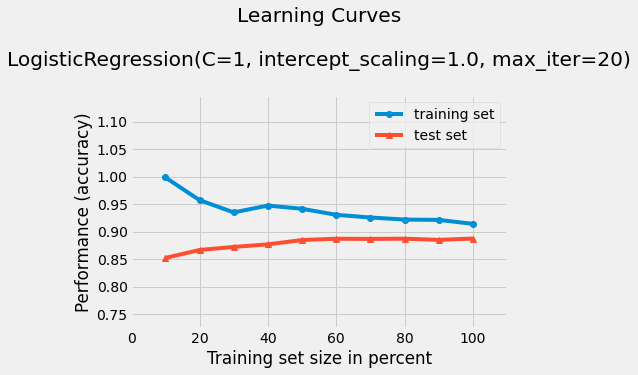

In [41]:
from mlxtend.plotting import plot_learning_curves
from matplotlib import pyplot as plt

X_plot_train, X_plot_test = reviews[:int(reviews.size*0.8)], reviews[int(reviews.size*0.8):]
Y_plot_train, Y_plot_test = ratings[:int(reviews.size*0.8)], ratings[int(reviews.size*0.8):]

plot_learning_curves(vector.transform(X_plot_train), Y_plot_train, vector.transform(X_plot_test), Y_plot_test, lg, scoring='accuracy')
plt.show()